In [1]:
## Yashank Rajvanshi
## 21it3030@rgipt.ac.in/yashankrajvanshi@gmail.com
## Fake News WebApp

from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import pickle

from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [18]:
pip install tensorflow

In [2]:
true = pd.read_csv(r"True1.csv")
fake = pd.read_csv(r"Fake1.csv")

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
true["target"] = 0
fake["target"] = 1

true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [4]:
df = pd.concat([true,fake])
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
print(len(true) + len(fake))
print(len(df))

44898
44898


In [6]:
import pandas as pd

# Assuming df is your DataFrame
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,target
0,‘Big Bang Theory’ Actor Tears Trump To PIECES...,When Donald Trump boldly declared that he had ...,News,"October 13, 2016",1
1,"RADICAL “TOLERANT” FEMALE Antifa, Black Bloc, ...",DC Antifa Leader Moved to Turkey with Man She ...,politics,"May 4, 2017",1
2,Algeria picks up 286 boat migrants en route to...,ALGIERS (Reuters) - Algeria s coastguard has p...,worldnews,"November 19, 2017",0
3,NEWT GINGRICH NAILS IT: “It’s a set up!”…”Come...,Newt Gingrich is dead on with his commentary o...,politics,"Jun 13, 2017",1
4,EMBARRASSING: Anti-Trump “THE HILL” Gets SLAMM...,"#JokeNewsAfter record, cold temperatures were ...",politics,"Dec 30, 2017",1


In [ ]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 195.7 kB/s eta 0:00:01
     ------------------------- ----------

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^

### Preprocessing

In [7]:
def basic_text_cleaning(line_from_column):
    # This function takes in a string, not a list or an array for the arg line_from_column
    
    tokenized_doc = word_tokenize(line_from_column)
    
    new_review = []
    for token in tokenized_doc:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    new_term_vector = []
    for word in new_review:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    final_doc = []
    for word in new_term_vector:
        final_doc.append(wordnet.lemmatize(word))
    
    return ' '.join(final_doc)

def get_dummies(df, col_target):
    df_y = pd.get_dummies(df[col_target])
    df_new = df.join(df_y)
    df_new = df_new.drop(col_target,axis=1)
    return df_new

def prep_features(df, labels, text):
    y = df[labels].values
    comments_train = df[text]
    comments_train = list(comments_train)
    
    return comments_train, y

def prep_tokenizer(texts,MAX_NB_WORDS):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(texts)
    
    print("Tokeniser created - Saving Tokeniser")
    
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    print("Tokeniser saved")
    
def prepare_training_test_data(texts,tokenizer,y):
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    print('Vocabulary size:', len(word_index))
    
    print("Padding sequences")
    
    data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
    print('Shape of data tensor:', data.shape)
    
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = y[indices]
    
    num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
    x_train = data[: -num_validation_samples]
    y_train = labels[: -num_validation_samples]
    x_val = data[-num_validation_samples: ]
    y_val = labels[-num_validation_samples: ]
    
    print('Number of entries in each category:')
    print('training: ', y_train.sum(axis=0))
    print('validation: ', y_val.sum(axis=0))
    
    print('Tokenized sentences: \n', data[0])
    print('One hot label: \n', labels[0])
    
    return x_train, y_train, x_val, y_val

In [8]:
wordnet = WordNetLemmatizer()
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [9]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100   
GLOVE_DIR = "glove/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [10]:
df = df[["text","target"]]
df.head()

,text,target
0,When Donald Trump boldly declared that he had ...,1
1,DC Antifa Leader Moved to Turkey with Man She ...,1
2,ALGIERS (Reuters) - Algeria s coastguard has p...,0
3,Newt Gingrich is dead on with his commentary o...,1
4,"#JokeNewsAfter record, cold temperatures were ...",1


In [15]:
from tqdm.notebook import tqdm

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Apply the function to the DataFrame
df["clean_text"] = df["text"].progress_apply(basic_text_cleaning)
df.head()


  0%|          | 0/44898 [00:00<?, ?it/s]

,text,target,clean_text
0,When Donald Trump boldly declared that he had ...,1,When Donald Trump boldly declared released sha...
1,DC Antifa Leader Moved to Turkey with Man She ...,1,DC Antifa Leader Moved Turkey Man She Met Surp...
2,ALGIERS (Reuters) - Algeria s coastguard has p...,0,ALGIERS Reuters Algeria coastguard picked 286 ...
3,Newt Gingrich is dead on with his commentary o...,1,Newt Gingrich dead commentary Comey leaking Co...
4,"#JokeNewsAfter record, cold temperatures were ...",1,JokeNewsAfter record cold temperature reported...


In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [16]:
df.to_csv("clean_news.csv")

In [17]:
df = pd.read_csv(r"clean_news.csv")
df["clean_text"]=df["clean_text"].astype(str)

In [18]:
len(df)

44898

In [19]:
df_labels =  pd.get_dummies(df["target"])
len(df_labels)

44898

In [20]:
df_labels = df_labels.reset_index()

In [21]:
df = df.reset_index()

In [22]:
df.head()

,index,Unnamed: 0,text,target,clean_text
0,0,0,When Donald Trump boldly declared that he had ...,1,When Donald Trump boldly declared released sha...
1,1,1,DC Antifa Leader Moved to Turkey with Man She ...,1,DC Antifa Leader Moved Turkey Man She Met Surp...
2,2,2,ALGIERS (Reuters) - Algeria s coastguard has p...,0,ALGIERS Reuters Algeria coastguard picked 286 ...
3,3,3,Newt Gingrich is dead on with his commentary o...,1,Newt Gingrich dead commentary Comey leaking Co...
4,4,4,"#JokeNewsAfter record, cold temperatures were ...",1,JokeNewsAfter record cold temperature reported...


In [23]:
df = df.drop("index",axis=1)

In [24]:
df.head()

,Unnamed: 0,text,target,clean_text
0,0,When Donald Trump boldly declared that he had ...,1,When Donald Trump boldly declared released sha...
1,1,DC Antifa Leader Moved to Turkey with Man She ...,1,DC Antifa Leader Moved Turkey Man She Met Surp...
2,2,ALGIERS (Reuters) - Algeria s coastguard has p...,0,ALGIERS Reuters Algeria coastguard picked 286 ...
3,3,Newt Gingrich is dead on with his commentary o...,1,Newt Gingrich dead commentary Comey leaking Co...
4,4,"#JokeNewsAfter record, cold temperatures were ...",1,JokeNewsAfter record cold temperature reported...


In [25]:
df_labels =  pd.get_dummies(df["target"])
df_labels = df_labels.reset_index()
df_labels = df_labels.drop("index",axis=1)
df_labels.head()

,0,1
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


In [26]:
df_new =df.join(df_labels)

In [27]:
df_new = get_dummies(df=df, col_target="target")
df_new.head()

,Unnamed: 0,text,clean_text,0,1
0,0,When Donald Trump boldly declared that he had ...,When Donald Trump boldly declared released sha...,False,True
1,1,DC Antifa Leader Moved to Turkey with Man She ...,DC Antifa Leader Moved Turkey Man She Met Surp...,False,True
2,2,ALGIERS (Reuters) - Algeria s coastguard has p...,ALGIERS Reuters Algeria coastguard picked 286 ...,True,False
3,3,Newt Gingrich is dead on with his commentary o...,Newt Gingrich dead commentary Comey leaking Co...,False,True
4,4,"#JokeNewsAfter record, cold temperatures were ...",JokeNewsAfter record cold temperature reported...,False,True


In [28]:
len(df_new)

44898

In [29]:
labels = [0,1]
x_train, y_train = prep_features(df=df_new, labels=[0,1], text="clean_text")
print(x_train[0])
print(y_train[0])

When Donald Trump boldly declared released shackle GOP shackled Star Trek Big Bang Theory actor Wil Wheaton resist It began oneword yet ohsobeautiful tweet shackle Wil SCREAMton wilw October 11 2016Then course Wheaton moved defining moment Trump campaign revelation spends lot time grabbing woman p ssies Oh gon na grab America pussy Or gon na punch face Or pay tax support Please tell http tco51Pn40hZpq Wil SCREAMton wilw October 11 2016And numerous numerous bankruptcy Oh wait Maybe going suck much money America declare bankruptcy everyone else suffers Wil SCREAMton wilw October 11 2016Then came boom Does anyone really believe Voldetrump shackled They nt even make shackle small enough tiny little hand Wil SCREAMton wilw October 11 2016Donald Trump terrible If Americans vote office next month President On top bully thin orange skin want build wall keep brown people country lock Muslims described concentration camp forcing register national database wear special little badge like Hitler ma

In [36]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [35]:
pip install --upgrade keras-preprocessing


     ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.6 kB 108.9 kB/s eta 0:00:01
     ------------------ ------------------- 20.5/42.6 kB 108.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.6 kB 100.9 kB/s eta 0:00:01
     -------------------------------------- 42.6/42.6 kB 129.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
x_train,y_train,x_test,y_test = prepare_training_test_data(texts=x_train,tokenizer=tokenizer,y=y_train)

Vocabulary size: 208476
Padding sequences
Shape of data tensor: (44898, 200)
Number of entries in each category:
training:  [17216 18703]
validation:  [4201 4778]
Tokenized sentences: 
 [   13   775   341    55   170  2488  7041   132   197  1238  2113   798
    32     2 15588  4821   526  1188   101     2  4509 15815   287   173
  3459    78 56411  2527     3  6528    24  1080   207    68   409  4853
   925   829   565    56    22   250   709   224  3839   117   669  3839
  1596  9663 18015  7002  3321   880  1133    25   936   611    41   262
     2    63   964    43   123   136 15815     3  1238    12 22498   148
   925   452 11775 11873   150  5052    63  2990  2381   409  4853 16644
   652   238  1821 13601   925    20     2   109   452  5158  2223   148
  3345  2080  8788 12151   629  3463   611    41  2068  6052  7895     7
    68   132 47276 16009  3018   710   376  4187   212    39   114   150
   130 11135  5602 10692    32  1214   126  6802  2700    33  3905 12403
   396  267

In [43]:
GLOVE_DIR = r'C:\Users\asus\Downloads\glove.6B\glove.6B.100d.txt'

embeddings_index = {}
word_index = tokenizer.word_index
f = open(GLOVE_DIR, encoding="utf8")
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: C:\Users\asus\Downloads\glove.6B\glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [44]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

In [45]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(2, activation="sigmoid")(x)

In [46]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embeddings (Embedding)      (None, 200, 100)          20847700  
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           38640     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                            

In [47]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [48]:
print('Training progress:')
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_data=(x_test, y_test))

Training progress:
Epoch 1/20


1123/1123 [==============================] - 67s 57ms/step - loss: 0.1453 - accuracy: 0.9416 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 2/20
1123/1123 [==============================] - 66s 59ms/step - loss: 0.0319 - accuracy: 0.9881 - val_loss: 0.0234 - val_accuracy: 0.9918
Epoch 3/20
1123/1123 [==============================] - 66s 59ms/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0212 - val_accuracy: 0.9926
Epoch 4/20
1123/1123 [==============================] - 66s 59ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0190 - val_accuracy: 0.9940
Epoch 5/20
1123/1123 [==============================] - 79s 70ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0194 - val_accuracy: 0.9940
Epoch 6/20
1123/1123 [==============================] - 66s 59ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0183 - val_accuracy: 0.9950
Epoch 7/20
1123/1123 [==============================] - 114s 102ms/step - loss: 0.0067 - accuracy: 0.99

In [49]:
model.save("LSTM_model_1.h5")

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
# serialize model to JSON
model_json = model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
import matplotlib.pyplot as plt

In [52]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/16/a2/3a113a948eabeb2031f1ae3f196a0a32cd570704


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


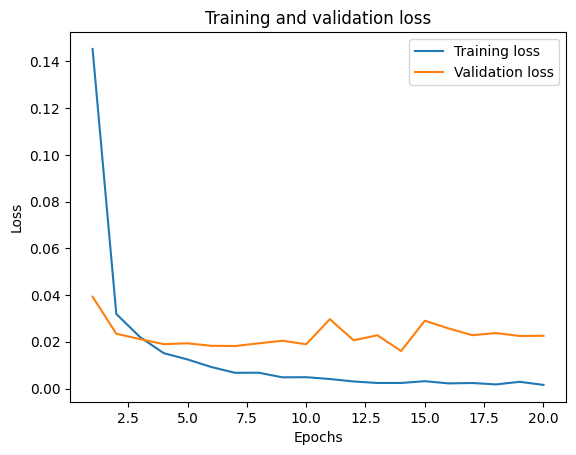

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [55]:
def predict(model,i):
    clean_text =[]
    i = basic_text_cleaning(i)
    clean_text.append(i)
    sequences = tokenizer.texts_to_sequences(clean_text)
    data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
    pred = model.predict(data)
    return pred

In [56]:
test = "Facebook Inc will allow employees participating in the protest to take the time off without drawing down their vacation days, spokesman Andy Stone said. Separately, online therapy company Talkspace said it ended partnership discussions with Facebook. Talkspace CEO Oren Frank tweeted he would “not support a platform that incites violence, racism, and lies.”"

In [64]:
predict(model=model_new,i=test)[0][0]

1/1 [==============================] - 0s 467ms/step


0.00013448528

In [58]:
model.predict(x_test)

281/281 [==============================] - 8s 22ms/step


array([[3.4575892e-12, 1.0000000e+00],
       [2.9679901e-11, 1.0000000e+00],
       [1.0000000e+00, 1.6025903e-10],
       ...,
       [3.1870915e-04, 9.9971688e-01],
       [1.0000000e+00, 2.9036832e-13],
       [7.6650153e-08, 9.9999994e-01]], dtype=float32)

In [59]:
x_test[2]

array([ 848,   17,  359,  129, 2504,   65,    1,  134,  198,  100,  141,
       1900,   32, 1432,  345, 1695,  171,   29,   45,  759,  141, 2237,
        138,   85,   59,  311,  134,  509, 1294,  724,    1, 1621,  171,
        643,  597,   36,   40,   14, 1075, 1143,   37,   82, 1432,  124,
        141, 2800,  141,  562, 5380, 1294,  387,   91,  387,   26,   65,
         30,  615,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [60]:
y_classes = predict(model=model,i=test).argmax(axis=-1)

1/1 [==============================] - 0s 86ms/step


In [61]:
y_classes[0]

1

In [63]:
from tensorflow.keras.models import load_model
model_new = load_model("LSTM_model_1.h5")